In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Research_Paper/creditcard_data.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [10]:
print(legit.shape)

(284315, 31)


In [11]:
print(fraud.shape)

(492, 31)


In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**The data is unbalanced so the following things are done to make it balanced**

**We are building a sample dataset similar to distribution of normal transcations and fraudulent transaction**

In [15]:
legit_sample =legit.sample(n=492) 

In [16]:
df_new= pd.concat([legit_sample,fraud],axis=0)

In [17]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177990,123428.0,-4.112382,-0.924126,-0.540237,-0.389432,1.108950,1.039839,0.234389,0.469457,1.503346,...,-0.898746,-0.334028,1.235692,-1.649348,-0.687197,-0.107457,0.172853,1.097419,60.51,0
254548,156782.0,-1.605642,1.472511,-2.175658,-1.033630,1.875049,3.474313,-0.777765,2.072372,-0.741585,...,-0.067121,-0.610188,0.140273,0.717492,-0.679403,0.302822,-0.330732,-0.016361,23.29,0
154765,102883.0,-0.201395,-4.140102,-2.084763,0.494690,-1.199614,0.772532,0.702084,-0.176129,2.717574,...,0.775158,-0.010824,-0.958366,-0.124523,-0.416358,-0.806265,-0.188342,0.148915,1161.73,0
83543,59908.0,-0.723106,-0.448436,1.740491,0.351453,-0.750276,0.483634,0.061866,0.279176,-1.655561,...,0.068543,0.317988,0.387962,-0.058529,-0.523414,-0.282300,0.162423,0.174692,168.00,0
39080,39683.0,-0.911714,-4.451479,-1.417396,0.211268,-1.793701,0.258621,0.953147,-0.170779,-0.808652,...,0.895875,-0.142379,-1.198295,-0.242737,0.224492,-0.151079,-0.233537,0.187228,1187.00,0


In [18]:
df_new['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94000.384146,-0.016852,0.041339,0.018719,-0.175783,-0.055022,0.011204,-0.048536,-0.080819,0.023695,...,0.014332,0.011380,-0.013774,0.023927,-0.007032,0.036760,-0.006327,-0.005563,-0.012597,79.694593
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
X=df_new.drop(columns='Class',axis=1)
y=df_new['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
177990  123428.0 -4.112382 -0.924126 -0.540237 -0.389432  1.108950  1.039839   
254548  156782.0 -1.605642  1.472511 -2.175658 -1.033630  1.875049  3.474313   
154765  102883.0 -0.201395 -4.140102 -2.084763  0.494690 -1.199614  0.772532   
83543    59908.0 -0.723106 -0.448436  1.740491  0.351453 -0.750276  0.483634   
39080    39683.0 -0.911714 -4.451479 -1.417396  0.211268 -1.793701  0.258621   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(y)

177990    0
254548    0
154765    0
83543     0
39080     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state=17)

In [24]:
y_true = y_test.values

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
X_train_pred = model.predict(X_train)
accuracy_model = accuracy_score(X_train_pred,y_train)

In [29]:
print('Accuracy on training data:',accuracy_model)

Accuracy on training data: 0.9161372299872935


In [30]:
X_test_pred = model.predict(X_test)
accuracy_model1 = accuracy_score(X_test_pred,y_test)

In [31]:
print('Accuracy on training data:',accuracy_model1)

Accuracy on training data: 0.9086294416243654


In [32]:
y_pred = model.predict(X_test)

In [33]:

# Evaluate the model using precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.96
Recall: 0.86
F1 Score: 0.90


In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        98
           1       0.96      0.86      0.90        99

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



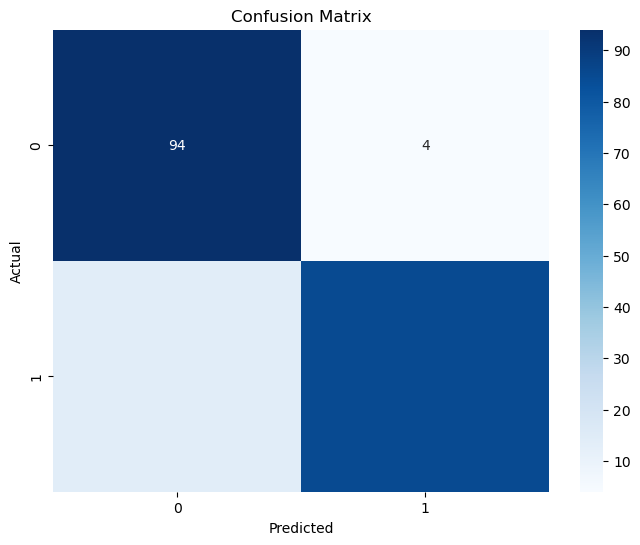

In [35]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


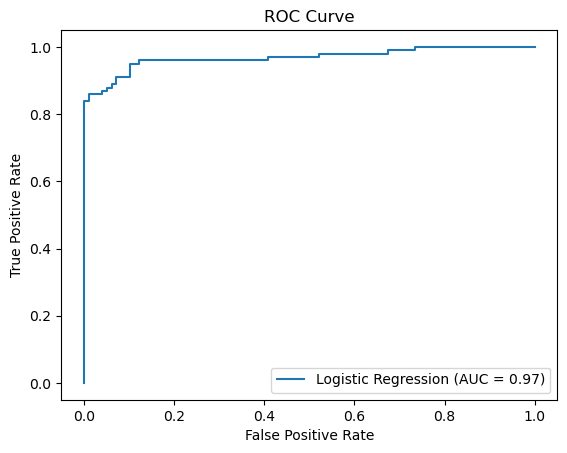

In [36]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.title('ROC Curve')
plt.show()


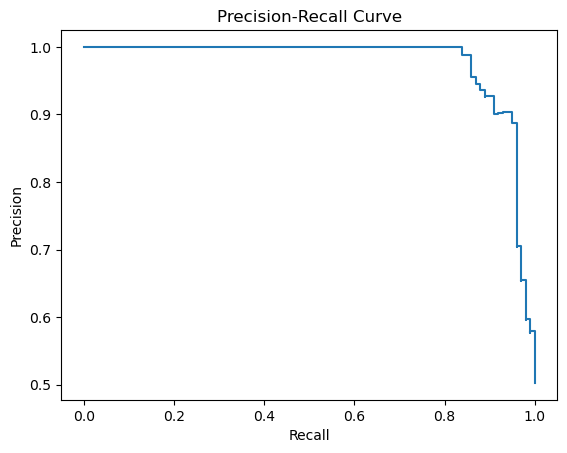

In [37]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay


precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob)
PrecisionRecallDisplay(precision=precision_curve, recall=recall_curve).plot()
plt.title('Precision-Recall Curve')
plt.show()


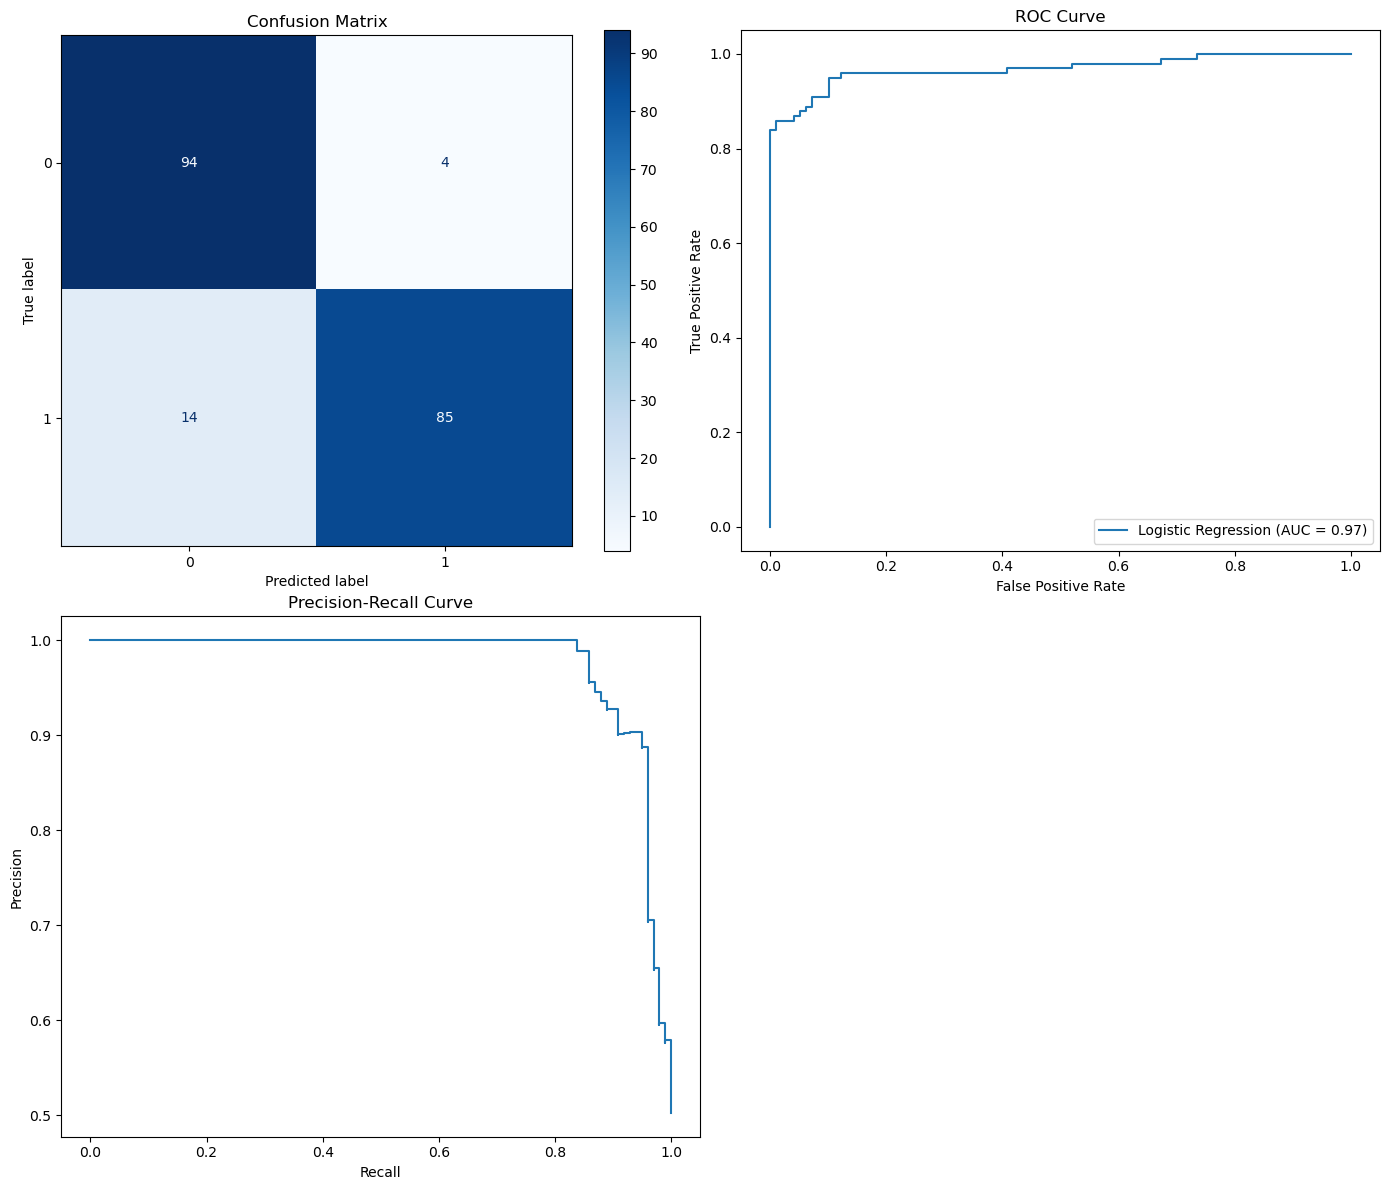

In [38]:
plt.figure(figsize=(14, 12))

# Confusion Matrix
plt.subplot(2, 2, 1)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=plt.gca(), cmap='Blues')
plt.title('Confusion Matrix')

# ROC Curve
plt.subplot(2, 2, 2)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot(ax=plt.gca())
plt.title('ROC Curve')

# Precision-Recall Curve
plt.subplot(2, 2, 3)
PrecisionRecallDisplay(precision=precision_curve, recall=recall_curve).plot(ax=plt.gca())
plt.title('Precision-Recall Curve')

# Showing the plots
plt.tight_layout()
plt.show()


In [40]:
print(y_true)

[0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0
 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 0]


In [44]:
y_pred_proba_logistic = model.predict_proba(X_test)[:, 1]

In [46]:
np.save('logistic_pred_proba.npy', y_pred_proba_logistic)